# Import library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset

In [ ]:
file_path = '/content/drive/MyDrive/MachineLearningFinal/melb_data_cleaned.xlsx'
data = pd.read_excel(file_path)

# Data Processing

In [ ]:

# Select necessary columns
columns = ['Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
           'Landsize', 'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount', 'Method', 'Price']
data = data[columns]

In [ ]:

# Handle missing values
data = data.dropna()

In [ ]:
# Encode categorical columns
label_encoders = {}
for col in ['Type', 'Regionname', 'Method']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split data into features (X) and target (y)

In [ ]:
X = data.drop(columns=['Price'])
y = data['Price']

# Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid search for best SVR parameters

In [ ]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='neg_mean_absolute_error')

# Find the best model

In [ ]:
best_svr = grid_search.best_estimator_

In [ ]:
# Predict with the best model
y_pred = best_svr.predict(X_test)

# Evaluate the model

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
# Output results
best_params = grid_search.best_params_
print({
    "Mean Absolute Error (MAE)": mae,
    "Root Mean Squared Error (RMSE)": rmse,
    "R-squared (R2)": r2,
    "Best Parameters": best_params
})

{'Mean Absolute Error (MAE)': 341654.57802525826, 'Root Mean Squared Error (RMSE)': 558806.4051046855, 'R-squared (R2)': 0.2405663369541743, 'Best Parameters': {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}}


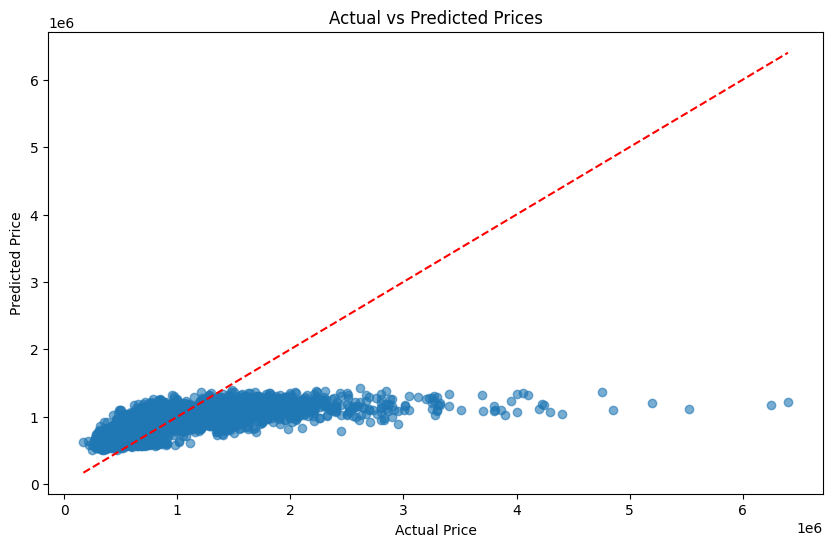

In [ ]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

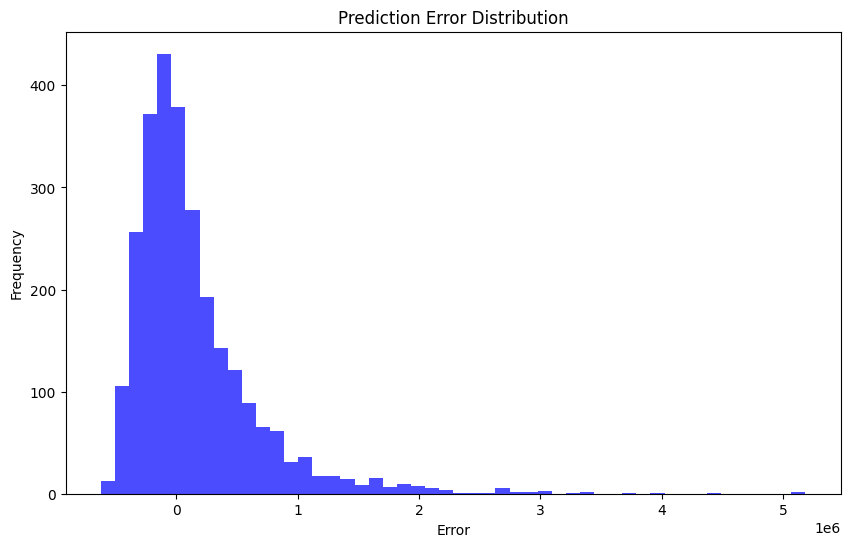

In [ ]:
# Visualization: Prediction Error Distribution
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7, color='blue')
plt.title('Prediction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()